#### MODELO CASUAL  

In [115]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math 

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


##### En este jupiter buscaremos preddecir los clientes `casuales`.
 <font color = 'sky blue'>- Buscaremos con qué variebles se pueden predecir mejor.
 - Hay que ver las métricas (R², RMSE...)

In [3]:
df= pd.read_csv("Bicicletas_limpio.csv", index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [ ]:
#del df['dteday']

In [28]:
numericas = df.select_dtypes(include = ['int64', 'float64'])
numericas.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<font color = 'sky blue'>  - Me voy a saltar el EDA para ir directamente a ver las variables que tenemos. Voy siguiendo el repaso de Ana.

### Variable respuesta

In [7]:
casuales = df['casual']
casuales.shape[0]

730

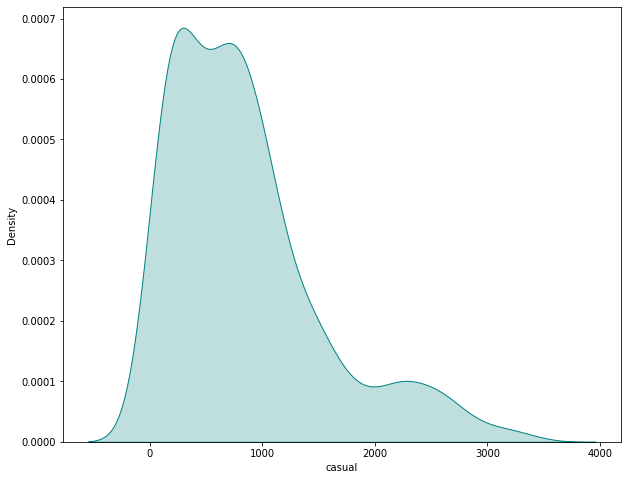

In [9]:
sns.distplot(df.casual, 
            hist = False, 
            color = 'teal', 
            kde_kws = {'shade':True, 'linewidth':1});

### Variables predictoras

In [14]:
columnas_numericas = df.select_dtypes(include = np.number).columns
columnas_numericas = columnas_numericas.drop('casual')

In [15]:
len(columnas_numericas)

13

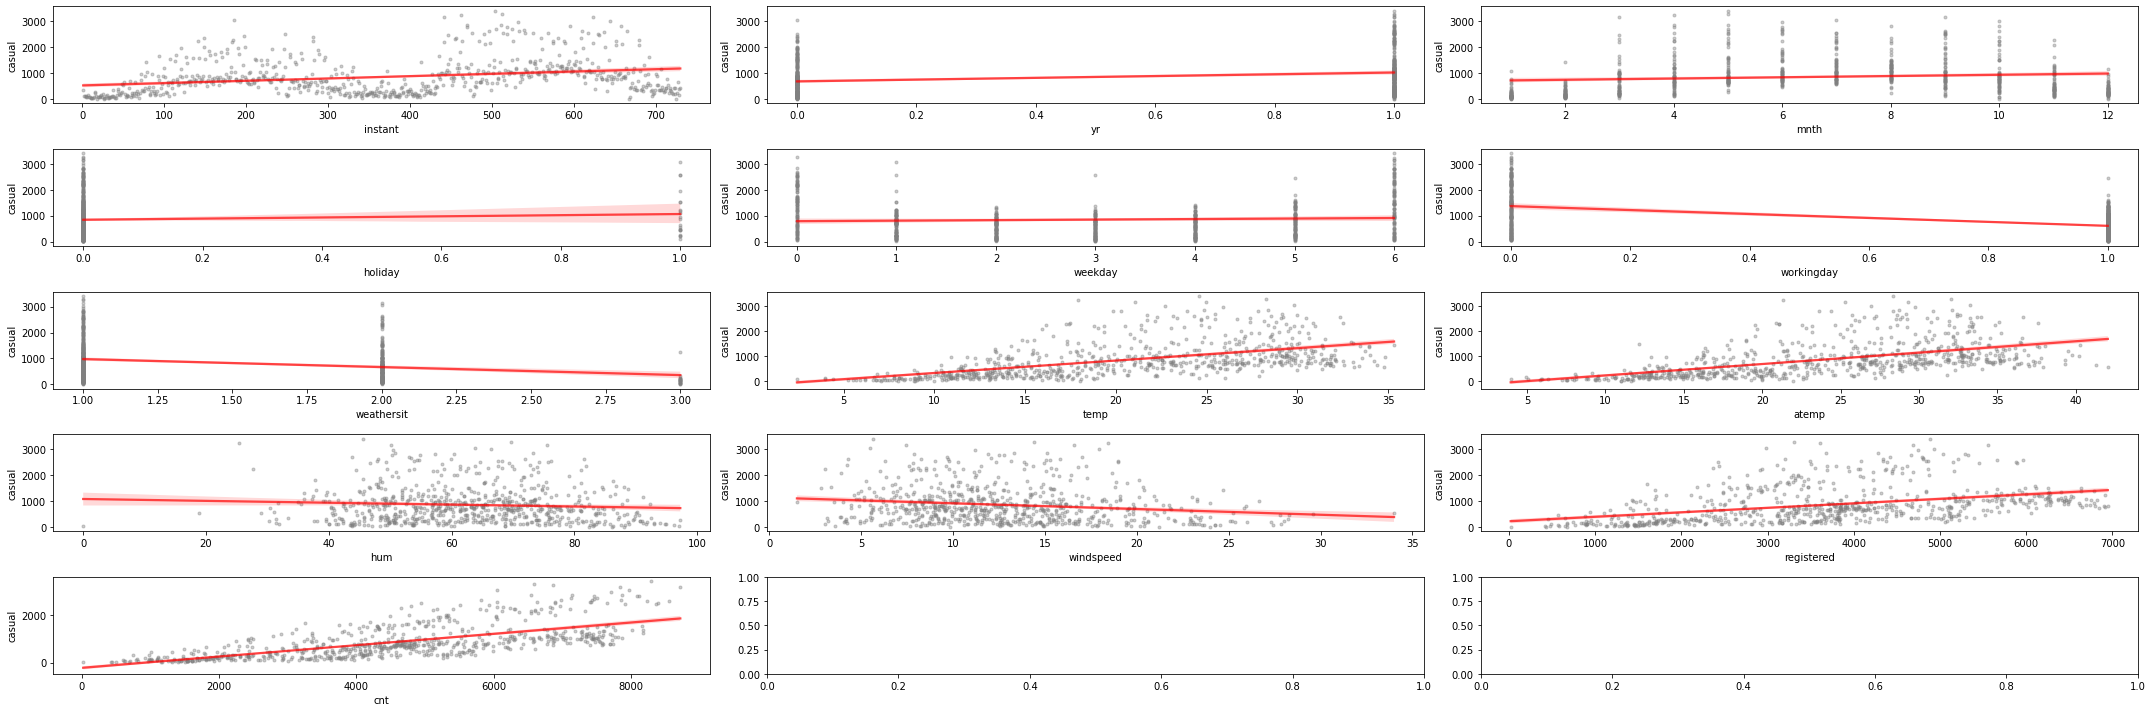

In [16]:
fig, axes = plt.subplots(5, 3, figsize = (30, 10))

axes = axes.flat

for i, col in enumerate(columnas_numericas):
    sns.regplot(
        x = df[col],
        y = df['casual'],
        color = 'gray',
        marker = '.',

        scatter_kws = {'alpha': 0.4},
        line_kws = {'color':'red','alpha':0.7},
        ax = axes[i])

fig.tight_layout();


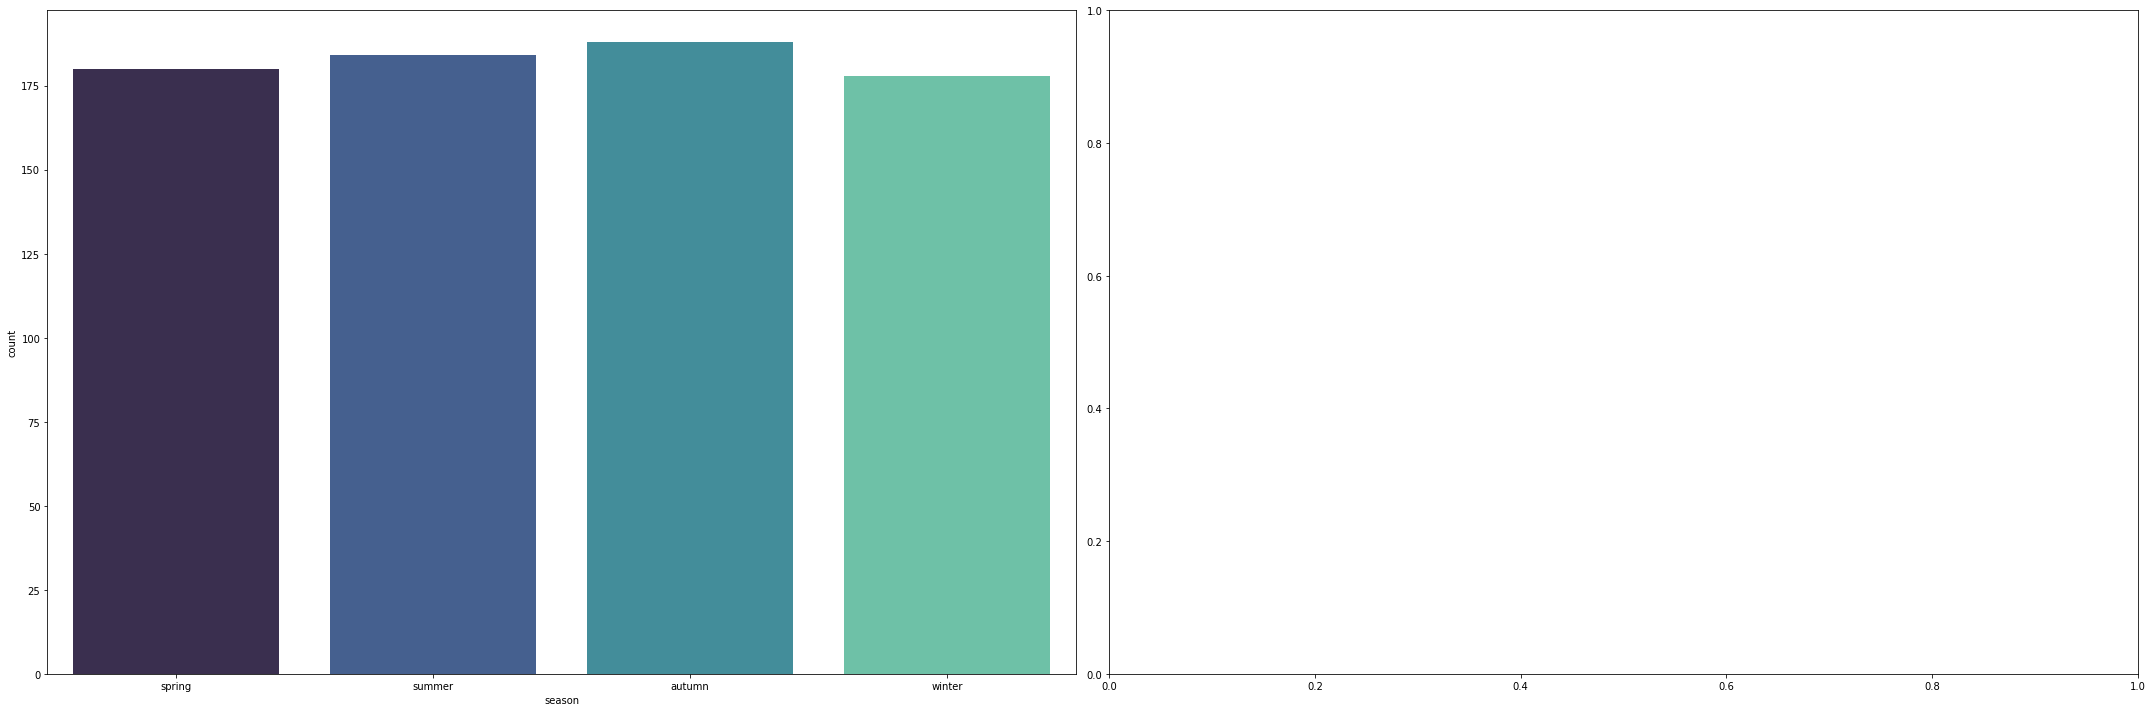

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (30, 10))
axes = axes.flat

columnas_object = df.select_dtypes(include = 'object').columns

for i, col, in enumerate(columnas_object):
    sns.countplot(df[col], ax = axes[i], palette = 'mako')

fig.tight_layout();

In [30]:
numericas.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


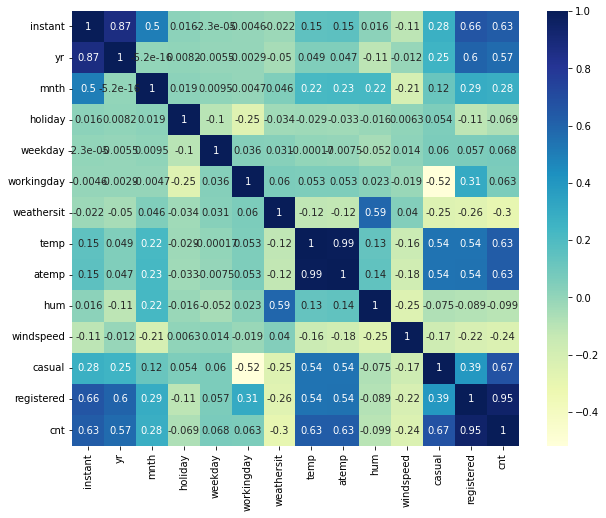

In [31]:
sns.heatmap(numericas.corr(), cmap = 'YlGnBu', annot = True);

| Test Shappiro | Resultado | Conclusión | 
|---|---|---| 
| p-value > 0.05 | No significativo | Datos normales| 
|p-value < 0.05| Significativo| Datos NO normales |

In [32]:
stats.shapiro(df['casual'])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [33]:
df['casual'], lambda_ajustada = stats.boxcox(df['casual'])

In [34]:
stats.shapiro(df['casual'])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

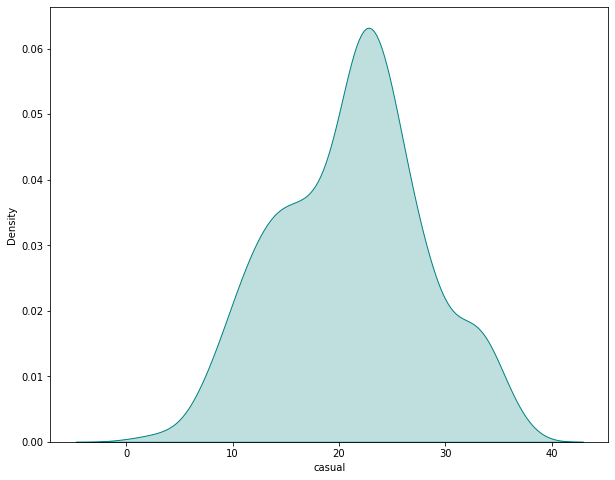

In [35]:
sns.distplot(df.casual, 
            hist = False, 
            color = 'teal', 
            kde_kws = {'shade':True, 'linewidth':1});

<font color = 'sky blue'> Después de aplicar Shappiro vemos que nuestros datos continúan no siendo normales, aunque han mejorado bastante.

## Homocedasticidad

| Test Levene | Resultado | Conclusión | 
|---|---|---| 
| p-value > 0.05 | No significativo | Cumple asunción, tienen varianzas similares| 
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares | 

#### Variable categórica ---> `season`

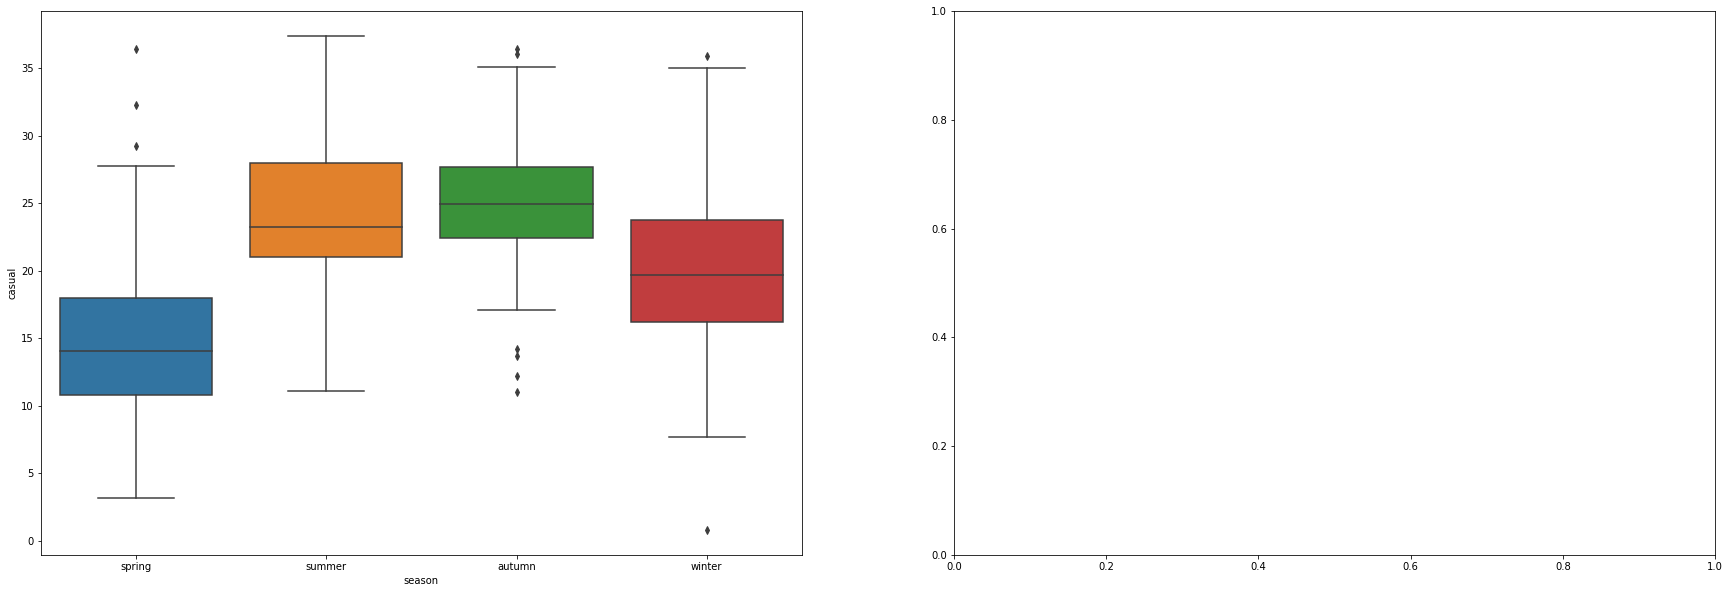

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (30, 10))
axes = axes.flat
colum_cat = df.select_dtypes(include = ['object', 'category']).columns

for i, col in enumerate(colum_cat):
    sns.boxplot(
        x = col,
        y = 'casual',
        data = df,
        palette = 'tab10',
        ax = axes[i]
    );

<font color = 'sky blue'> No deberíamos incluir la variable `season` ya que no es homogénea y no nos funcionaría bien en una regresión lineal.

In [41]:
def datos_test_levene(columna, df): 
    valores = df[columna].unique() 
    d = {} 
    for x in valores: 
        d[x] = df[df[columna] == x]["casual"] 
    return d 

In [42]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,16.397820,654,985
1,2,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,11.472437,670,801
2,3,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,11.076035,1229,1349
3,4,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,10.613970,1454,1562
4,5,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,9.475537,1518,1600


In [43]:
year = datos_test_levene('yr', df)
month = datos_test_levene('mnth', df)
holiday = datos_test_levene('holiday', df)
weekday = datos_test_levene('weekday', df)
workingday = datos_test_levene('workingday', df)
weathersit = datos_test_levene('weathersit', df)
temp = datos_test_levene('temp', df)
atemp = datos_test_levene('atemp', df)
hum = datos_test_levene('hum', df)
windspeed = datos_test_levene('windspeed', df)

In [46]:
stats.levene(year[0], year[1], center = 'median')

LeveneResult(statistic=0.00038911699024999746, pvalue=0.9842673161397686)

In [53]:
stats.levene(month[1], month[2], month[3], month[4], month[5], month[6], month[7], month[8], month[9], month[10], month[11], 
             month[12],center = 'median')

LeveneResult(statistic=3.7580384153400903, pvalue=3.004622270635963e-05)

In [55]:
stats.levene(holiday[0], holiday[1], center = 'median')

LeveneResult(statistic=0.32762284478790343, pvalue=0.5672389204600601)

In [57]:
stats.levene(weekday[1], weekday[2], weekday[3], weekday[4], weekday[5], weekday[6], center = 'median')

LeveneResult(statistic=3.2809580240805385, pvalue=0.006216439561824791)

In [59]:
stats.levene(workingday[0], workingday[1], center = 'median')

LeveneResult(statistic=22.54696449874117, pvalue=2.4700156312323087e-06)

In [61]:
stats.levene(weathersit[1], weathersit[2], weathersit[3], center = 'median')

LeveneResult(statistic=2.1855697071831948, pvalue=0.1131517456948248)

<font color = 'sky blue'> Vemos en el p valor que `year`, `holiday` y `weathersit` tienen varianzas iguales por lo que podremos usarlas para nestro modelo. Hay que hacer bins para `temp`, `atemp`, `hum` y `windspeed` para poder hacerles levene porque es imposible si no ( el for podría valer pero no me sale con ese diccionario)

<font color = 'teal'> Intento hacer un for para que me saque los levene de todos a la vez pero hay que iterar por un diccionario raro.

In [49]:
# nums = year, month, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed	

In [ ]:
# type(year)

In [ ]:
# for col in nums:
#     for keys in col:

#         stats.levene(col[keys[0]], col[keys[1]], center = 'median')

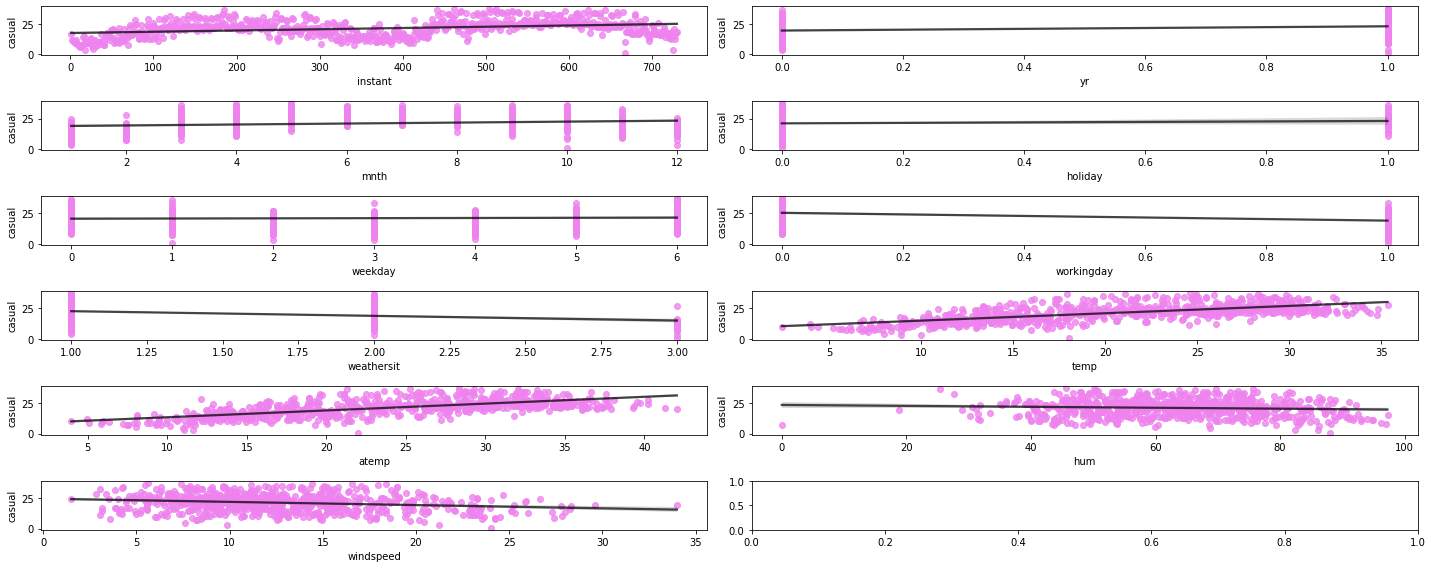

In [70]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (20, 8)) 

# definimos una lista de colores. Cada color corresponderá a una gráfica 
lista_colores = ["cadetblue", "seagreen"] 
 
axes = axes.flat 

# seleccionamos las columnas que queremos graficar 
columnas_numeric = df.select_dtypes(include = np.number).drop(['casual', 'registered', 'cnt'], axis=1) 
columnas_numeric = columnas_numeric.columns 

for i, colum in enumerate(columnas_numeric): 
    sns.regplot( 
        data = df, 
        x = colum, 
        y = 'casual', 
        color = 'violet', 
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i]) 

fig.tight_layout(); 

<font color = 'sky blue'> Parece que hay homocedasticidad en atemp, temp, hum y windspeed.

In [76]:
resultados = {}

numer = numericas.columns.drop(['casual', 'registered', 'cnt', 'instant'])

for col in numer:
    stats, p_value = levene(df[col], df.casual, center = 'median')

    resultados[col] = p_value

In [77]:
resultados

{'yr': 8.018725365858655e-174,
 'mnth': 4.2314563376598296e-47,
 'holiday': 9.57281502299451e-199,
 'weekday': 8.915628105831126e-106,
 'workingday': 6.949282664184961e-182,
 'weathersit': 3.859216573548085e-177,
 'temp': 5.833319378367082e-07,
 'atemp': 4.953287402796698e-12,
 'hum': 8.60376546170806e-66,
 'windspeed': 6.605233869387679e-13}

<font color = 'sky blue'> Bueno, pues según esto ninguno es homocedástico :(

## INDEPENDENCIA (CHI²)

| Test Independencia | Resultado | Conclusión | 
|---|---|---| 
| p-value > 0.05 | No significativo | Cumple asunción, tienen varianzas similares| 
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares | 

In [79]:
columnas = df.columns
columnas

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [74]:
combinaciones = list(itertools.combinations(columnas,2))
combinaciones

[('instant', 'season'),
 ('instant', 'yr'),
 ('instant', 'mnth'),
 ('instant', 'holiday'),
 ('instant', 'weekday'),
 ('instant', 'workingday'),
 ('instant', 'weathersit'),
 ('instant', 'temp'),
 ('instant', 'atemp'),
 ('instant', 'hum'),
 ('instant', 'windspeed'),
 ('instant', 'casual'),
 ('instant', 'registered'),
 ('instant', 'cnt'),
 ('season', 'yr'),
 ('season', 'mnth'),
 ('season', 'holiday'),
 ('season', 'weekday'),
 ('season', 'workingday'),
 ('season', 'weathersit'),
 ('season', 'temp'),
 ('season', 'atemp'),
 ('season', 'hum'),
 ('season', 'windspeed'),
 ('season', 'casual'),
 ('season', 'registered'),
 ('season', 'cnt'),
 ('yr', 'mnth'),
 ('yr', 'holiday'),
 ('yr', 'weekday'),
 ('yr', 'workingday'),
 ('yr', 'weathersit'),
 ('yr', 'temp'),
 ('yr', 'atemp'),
 ('yr', 'hum'),
 ('yr', 'windspeed'),
 ('yr', 'casual'),
 ('yr', 'registered'),
 ('yr', 'cnt'),
 ('mnth', 'holiday'),
 ('mnth', 'weekday'),
 ('mnth', 'workingday'),
 ('mnth', 'weathersit'),
 ('mnth', 'temp'),
 ('mnth', 'ate

In [80]:
for par in combinaciones:
    crosstab, test_result, expecte = rp.crosstab(df[par[0]], 
                                                 df[par[1]], 
                                                 test = 'chi-square', 
                                                 expected_freqs = True, 
                                                 prop = 'cell')
    print('----------', par[0], par[1],'------------')
    print(test_result)

---------- instant season ------------
                   Chi-square test    results
0  Pearson Chi-square ( 2187.0) =   2190.0000
1                       p-value =      0.4779
2                    Cramer's V =      1.0000
---------- instant yr ------------
                  Chi-square test   results
0  Pearson Chi-square ( 729.0) =   730.0000
1                      p-value =     0.4826
2                   Cramer's V =     1.0000
---------- instant mnth ------------
                   Chi-square test    results
0  Pearson Chi-square ( 8019.0) =   8030.0000
1                       p-value =      0.4633
2                    Cramer's V =      1.0000
---------- instant holiday ------------
                  Chi-square test   results
0  Pearson Chi-square ( 729.0) =   730.0000
1                      p-value =     0.4826
2                   Cramer's V =     1.0000
---------- instant weekday ------------
                   Chi-square test    results
0  Pearson Chi-square ( 4374.0) =   4380.00

<font color = 'sky blue'> Las combinaciones de variables dependientes son:
 - season + mnth
 - season + temp
 - mnth + temp
 - holiday + weekday
 - holiday + workingday
 - weekday + workingday
 - temp + hum
 - temp + windspeed

## ANOVA

In [81]:
ls = ols('casual ~ season + mnth + temp + holiday + weekday + workingday + hum + windspeed', data = df).fit()
sm.stats.anova_lm(ls)


,df,sum_sq,mean_sq,F,PR(>F)
season,3.0,12670.372426,4223.457475,358.788271,2.219216e-142
mnth,1.0,11.316219,11.316219,0.961328,3.271824e-01
temp,1.0,3665.728361,3665.728361,311.408448,3.540277e-58
holiday,1.0,171.743652,171.743652,14.589849,1.451755e-04
weekday,1.0,91.798650,91.798650,7.798416,5.368160e-03
workingday,1.0,7528.060804,7528.060804,639.518672,1.964739e-101
hum,1.0,1159.201760,1159.201760,98.475715,7.727328e-22
windspeed,1.0,705.358205,705.358205,59.921108,3.354008e-14
Residual,719.0,8463.671124,11.771448,NaN,NaN


In [82]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          1.34e-211
Time:                        20:44:52   Log-Likelihood:                -1930.3
No. Observations:                 730   AIC:                             3883.
Df Residuals:                     719   BIC:                             3933.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.1865      1.251     16.941      0.000      18.731      23.642
season[T.spring]    -0.6077      0.692     -0.878      0.380      -1.966       0.751
season[T.summer]     3.1938      0.459      6.959      0.000       2.293       4.095
season[T.winter]     1.9028      0.548      3.473      0.001       0.827       2.979
mnth                 0.0624      0.068      0.915      0.361      -0.072       0.196
temp                 0.5983      0.031     19.599      0.000       0.538       0.658
holiday             -2.0323      0.791     -2.571      0.010      -3.584      -0.480
weekday              0.1624      0.064      2.544      0.011       0.037       0.288
workingday          -7.1329      0.283    -25.219      0.000      -7.688      -6.578
hum                 -0.1071      0.009    -11.310      0.000      -0.126      -0.088
windspeed           -0.2002      0.026     -7.741      0.000      -0.251      -0.149
==============================================================================
Omnibus:                       20.914   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.186
Skew:                          -0.231   Prob(JB):                     6.22e-08
Kurtosis:                       3.937   Cond. No.                         765.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = 'sky blue'> En la tabla de arriba miramos 'coef'. Es el coeficiente de esos datos. En el intercept nos dice de donde parte la línea en la gráfica.
Lo que sale debajo nos dice la inclinación por cada categoría. 

## ¡VAMOS A POR ESA REGRESIÓN A VER QUÉ PASAAAAA! 🤘​

<font color = 'sky blue'> Recordamos que esta regresión es para `casual` con las variables que antes vimos que tenían un p valor buenete.

In [90]:
mapa_season = {"spring": 0,"summer": 1, "autumn": 2, "winter": 3} 
df["season"] = df["season"].map(mapa_season)

<font color = 'sky blue'>He hecho el map para season porque antes no lo tenía ha¡echo y no la pillaba porque es categórica.

In [91]:
X = df.drop(['casual', 'registered', 'cnt'], axis =1)
y = df[['casual']]

In [92]:
X.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
1,2,0,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
2,3,0,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
3,4,0,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
4,5,0,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300


In [93]:
y.head()

,casual
0,16.397820
1,11.472437
2,11.076035
3,10.613970
4,9.475537


In [94]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [95]:
X_train.shape

(584, 12)

In [96]:
x_test.shape

(146, 12)

In [97]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred_test = pd.DataFrame(lr.predict(x_test))
y_pred_test.head()

,0
0,29.583353
1,26.307610
2,21.160208
3,14.185576
4,25.091023


In [99]:
y_pred_test['reales'] = y_test

In [100]:
y_pred_test

,0,reales
0,29.583353,NaN
1,26.307610,NaN
2,21.160208,11.076035
3,14.185576,NaN
4,25.091023,NaN
...,...,...
141,14.658922,NaN
142,15.889423,NaN
143,31.371966,NaN
144,19.330373,NaN


In [101]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(X_train)

In [102]:
def metricas(y_test, y_train, y_test_pred, y_train_pred): 
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), 
                          metrics.mean_absolute_error(y_train, y_train_pred)], 
                  'MSE': [metrics.mean_squared_error(y_test, y_test_pred), 
                          metrics.mean_squared_error(y_train, y_train_pred)], 
                  'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 
                           np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))], 
                  'R2': [metrics.r2_score(y_test, y_test_pred), 
                         metrics.r2_score(y_train, y_train_pred)], "set": ["test", "train"]} 
    df = pd.DataFrame(resultados) 
    return df 

In [103]:
results = metricas(y_test, y_train, y_pred_test, y_pred_train)
results

,MAE,MSE,RMSE,R2,set
0,2.645407,14.070736,3.751098,0.707381,test
1,2.501852,11.035039,3.321903,0.764843,train


<font color = 'sky blue'>El R² es 0,7 que no es mal resultado, lo que indica un casi buen ajuste lineal. Los valores de MAE y RMSE son bajos por lo que el margen de error de las predicciones es bajo 🌻​​🐝​

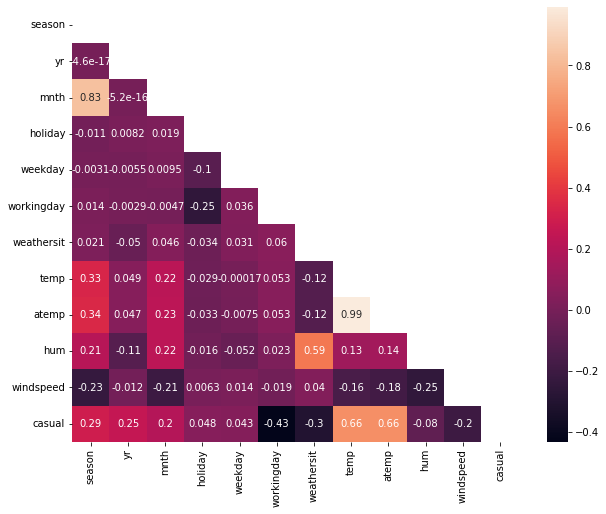

In [106]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df.drop(columns = ['registered','cnt', 'instant']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True );

<font color = 'sky blue'> Vamos a hacer el VIF y repetir el modelo de regresión para ver si las métricas cambian. 🎭​

In [113]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,16.397820,654,985
1,2,0,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,11.472437,670,801
2,3,0,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,11.076035,1229,1349
3,4,0,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,10.613970,1454,1562
4,5,0,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,9.475537,1518,1600


In [110]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [111]:
get_VIF(df,'casual')

instant       583.831002
yr            445.643347
mnth          148.396692
atemp          64.914671
const          64.400609
temp           63.778925
registered     30.581207
cnt            28.058249
season          4.097472
workingday      3.119745
hum             1.957897
weathersit      1.931184
windspeed       1.253241
holiday         1.098310
weekday         1.051746
dtype: float64

<font color = 'skyblue'> Pues he decidido cargarme yr, mnth, temp y atemp porque tienen valores altos y parece que weathersit ya engloba la temperatura con más cosas y también me cargo registered y cnt por razones obvias 🙃​

In [114]:
get_VIF(df.drop(columns = ['instant','yr','mnth', 'atemp', 'temp', 'registered', 'cnt']),'casual')

const         41.763593
hum            1.804928
weathersit     1.656824
windspeed      1.161945
season         1.092415
holiday        1.078717
workingday     1.072520
weekday        1.019624
dtype: float64

<font color = 'sky blue'> Baia, han cambiado los números. Ahora están más bajitos. Vamos a repetir em modelo de regresión a ver si mejoran las métricas.

In [116]:
x = df.drop(columns = ['instant','yr','mnth', 'atemp', 'temp', 'registered', 'cnt'])
y = df['casual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Creamos la regresión lineal
LR = LinearRegression(normalize= True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 2.919658426745403e-15
EL RMSE es  4.0937743703462345e-15
Para el conjunto test:---------------
El valor de r2 score es  1.0
El valor de r2 score adjusted es  1.0
El MAE es 2.8592045017743757e-15
EL RMSE es  3.997816662386246e-15


<font color = 'sky blue'> Mmmmm... vale... R² y R² ajustados son 1, lo que, en teoría, significa un ajuste linear perfecto (?). Pero el RMSE es negativo y no sé como interpretar eso. Lo preguntaré mañana en clase.

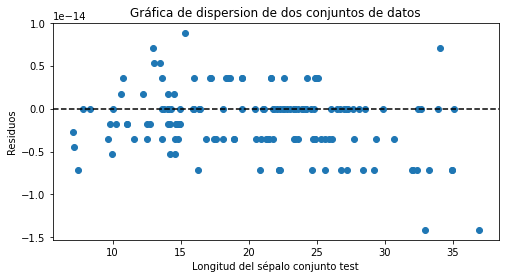

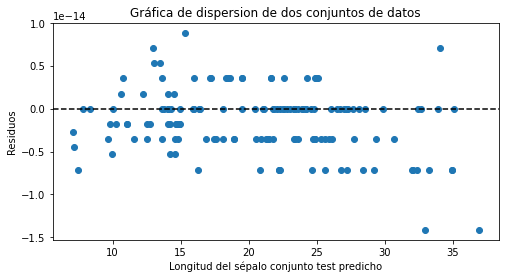

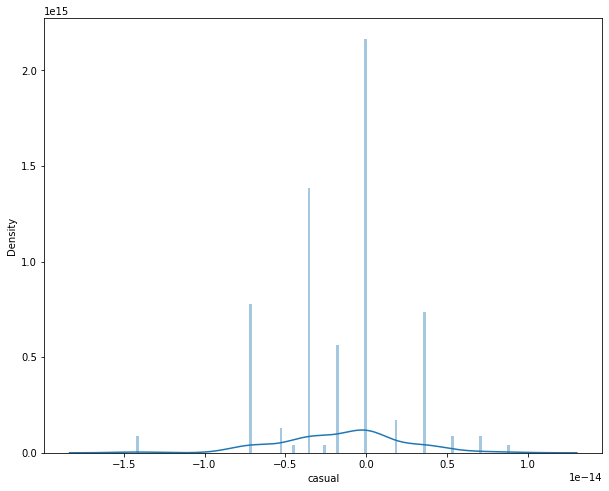

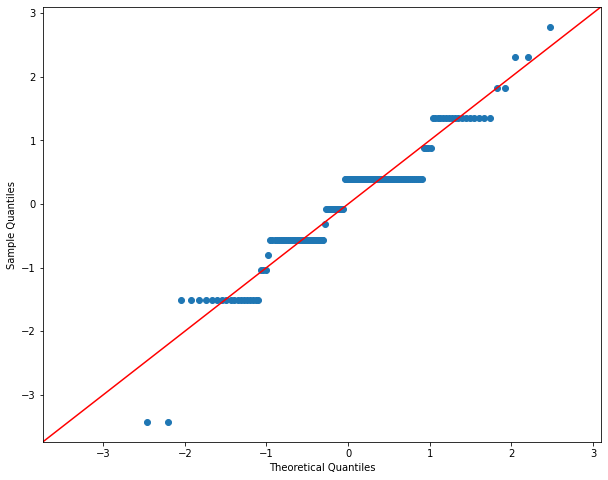

In [117]:
residuals = (y_test - y_prediction)


# 2. Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Longitud del sépalo conjunto test')
ax.set_ylabel('Residuos')
plt.show()


# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Longitud del sépalo conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

# 4. Normalidad
# preprocessing.normalize()
fig = plt.figure()
sns.distplot(residuals,bins = len(residuals))
plt.show()
sm.qqplot(residuals, line = '45', fit = True)
py.show()

<font color = 'sky blue'> Esto estaba en la lección. Es para ver el ajuste gráficamente pero no sé muy bien cómo interpretarlo ni qué representa cada eje, pero lo dejo aquí por si le sacamos probecho, que seguro que sí, y no lo tenemos que ir buscando por las lecciones :) ​🌈​